<a href="https://colab.research.google.com/github/himanshivarma/DAY1/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install matplotlib-venn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
#importing the data
data=pd.read_csv('Iris.csv')
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [7]:
X=data.iloc[:, :-1]
y=data.iloc[:, -1]

In [8]:
X.head(1)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2


In [9]:
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
#standardizing the required data
pp = StandardScaler()
X= pp.fit_transform(X)
X = pd.DataFrame(X,columns=data.columns[: -1])
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-1.720542,-0.900681,1.032057,-1.341272,-1.312977
1,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.674353,-1.385353,0.337848,-1.398138,-1.312977
3,-1.651258,-1.506521,0.106445,-1.284407,-1.312977
4,-1.628164,-1.021849,1.263460,-1.341272,-1.312977


In [12]:
#dimension reduction
pca = PCA(n_components=2)
X=pca.fit_transform(X)
X=pd.DataFrame(X,columns=['PC1','PC2'])
X.head()

,PC1,PC2
0,-2.816339,0.506051
1,-2.645527,-0.651799
2,-2.879481,-0.321036
3,-2.810934,-0.577363
4,-2.879884,0.670468


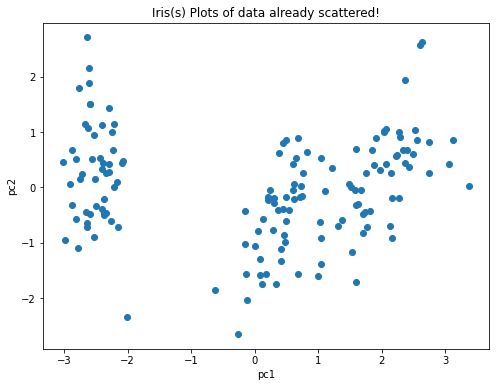

In [13]:
#Visualization of the data
plt.figure(figsize=(8,6))
plt.scatter(X['PC1'],X['PC2'])
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('Iris(s) Plots of data already scattered!')
plt.show()

In [14]:

#training the model
k_means = KMeans(n_clusters = 3)
k_means_model=k_means.fit(X)

In [15]:
fig=plt.figure(figsize=(14,6))

<Figure size 1008x432 with 0 Axes>

<ipython-input-18-0b627907c5de>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 =fig.add_subplot(121)


Text(0.5, 1.0, 'Predicted clusters along with the data center')

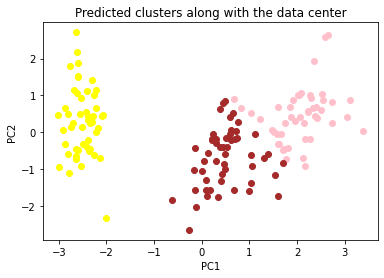

In [18]:
#prediction
ax1 =fig.add_subplot(121)
predi=k_means_model.predict(X)
colours = ['pink','yellow','brown']
for idx in range(3):
   plt.scatter(X[predi == idx]['PC1'],X[predi == idx]['PC2'],c = colours[idx])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Predicted clusters along with the data center')   

In [19]:
#3 clusters are there so
k=3
df_clusters = [X[k_means_model.labels_==i] for i in range(k)]
len(df_clusters)

3

In [22]:
himanshi_dict={
    'size':[len(df_clusters[i]) for i in range(k)],
    'cluster': list(range(k)),
    'Mean PC1':[round(df_clusters[i]['PC1'].mean(),2)
                for i in range(k)],
    'Standard PC1': [round(df_clusters[i]['PC2'].std(),2)
                for i in range(k)],
    'Mean PC2':[round(df_clusters[i]['PC1'].mean(),2)
                for i in range(k)],
    'Standard PC2': [round(df_clusters[i]['PC2'].std(),2)
                for i in range(k)],                    
}

In [23]:
df_clusters_stats = pd.DataFrame(himanshi_dict)
df_clusters_stats

,size,cluster,Mean PC1,Standard PC1,Mean PC2,Standard PC2
0,48,0,2.06,0.73,2.06,0.73
1,50,1,-2.50,0.94,-2.50,0.94
2,52,2,0.50,0.78,0.50,0.78


# New Section